# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
weather_api_key = os.getenv("weather_api_key")
type(weather_api_key)
print(weather_api_key)

671a0be6ec53c61db871b7410f62083b


In [10]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
#Url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
#Define empty lists to store values
cloudy = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
win_spd = []
city_name = []

#Looping through cities to make api calls using city as query
x = 1
for city in cities:
    city = city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudy.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        #city_time = datetime.datetime.fromtimestamp(response["dt"])
        date.append(response["dt"]) 
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        win_spd.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {x}|{city}")
        x+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|bubaque
City not found. skipping.
Processing record 2|rikitea
Processing record 3|vaini
Processing record 4|busselton
Processing record 5|saskylakh
Processing record 6|hofn
Processing record 7|chokurdakh
City not found. skipping.
Processing record 8|wuwei
Processing record 9|uyemskiy
Processing record 10|hithadhoo
Processing record 11|jiuquan
Processing record 12|bredasdorp
Processing record 13|saint-philippe
Processing record 14|hobart
Processing record 15|avarua
Processing record 16|port elizabeth
Processing record 17|lebu
Processing record 18|souillac
Processing record 19|puerto madryn
City not found. skipping.
Processing record 20|ushuaia
City not found. skipping.
Processing record 21|jerome
Processing record 22|butaritari
Processing record 23|naze
Processing record 24|hermanus
Processing record 25|faanui
Processing record 26|beringovskiy
Processing record 27|ilulissat
Processing record 28|talnakh
Processing record 29|sao filipe
Processing record 30|cape town
Pr

Processing record 250|lima
Processing record 251|thompson
Processing record 252|sangar
Processing record 253|bako
Processing record 254|berlevag
City not found. skipping.
Processing record 255|shupiyan
Processing record 256|ostrovnoy
Processing record 257|lompoc
Processing record 258|batagay
Processing record 259|virginia beach
Processing record 260|mehamn
Processing record 261|san patricio
Processing record 262|kruisfontein
Processing record 263|dawson creek
Processing record 264|dolores
Processing record 265|norman wells
City not found. skipping.
Processing record 266|alghero
Processing record 267|zhoucheng
City not found. skipping.
Processing record 268|stavern
Processing record 269|nouadhibou
Processing record 270|brownsville
City not found. skipping.
Processing record 271|mahebourg
Processing record 272|fort nelson
Processing record 273|ancud
Processing record 274|kitui
Processing record 275|mahibadhoo
Processing record 276|urzhum
City not found. skipping.
City not found. skipping

Processing record 486|buraydah
Processing record 487|major isidoro
Processing record 488|ust-ordynskiy
Processing record 489|asfi
Processing record 490|garden city
Processing record 491|phonhong
Processing record 492|termiz
Processing record 493|canutama
Processing record 494|gamba
Processing record 495|hilton head island
Processing record 496|christchurch
Processing record 497|luwingu
City not found. skipping.
Processing record 498|san rafael
City not found. skipping.
Processing record 499|nikita
Processing record 500|saint-francois
Processing record 501|san-pedro
Processing record 502|medford
Processing record 503|kil
Processing record 504|grand-santi
Processing record 505|rondonopolis
City not found. skipping.
Processing record 506|berdigestyakh
Processing record 507|mattawa
Processing record 508|grand gaube
Processing record 509|jelgava
Processing record 510|salaga
Processing record 511|carahue
Processing record 512|verkh-usugli
Processing record 513|mosetse
Processing record 514|m

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudy, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Latitude":lat,
                        "Longitude":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":win_spd
                                         })
city_df = city_df.rename_axis('City ID')
pd.to_datetime(city_df["Date"])
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Bubaque,100,GW,1630004738,77,11.2833,-15.8333,80.51,4.83
1,Rikitea,0,PF,1630004481,70,-23.1203,-134.9692,71.71,11.45
2,Vaini,40,TO,1630004739,77,-21.2000,-175.2000,66.36,9.22
3,Busselton,50,AU,1630004740,55,-33.6500,115.3333,47.08,16.71
4,Saskylakh,100,RU,1630004740,87,71.9167,114.0833,36.55,16.93


In [24]:
city_df.to_csv("../output_data/city.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
test_df = city_df["Humidity"].describe(include = "all")
print("The maximum humidity value is 100%, so there are no values greater than 100% in our data!")
test_df.head()

The maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    537.000000
mean      68.929236
std       22.814523
min        7.000000
25%       58.000000
Name: Humidity, dtype: float64

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

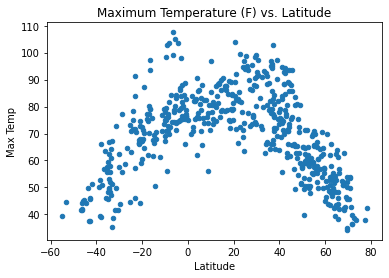

In [54]:
lat_vs_temp = city_df.plot(kind="scatter", x="Latitude", y="Max Temp", 
                                      title="Maximum Temperature (F) vs. Latitude")
lat_vs_temp
lat_vs_temp.get_figure().savefig("../output_data/Temp_vs_Latitude_of_Cities.png")

## Latitude vs. Humidity Plot

<AxesSubplot:title={'center':'Humidity (%) vs. Latitude'}, xlabel='Latitude', ylabel='Humidity'>

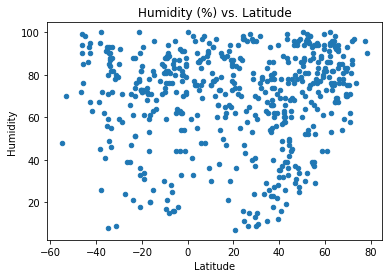

In [55]:
lat_vs_humidity = city_df.plot(kind="scatter", x="Latitude", y="Humidity", 
                                      title="Humidity (%) vs. Latitude")
lat_vs_humidity

## Latitude vs. Cloudiness Plot

<AxesSubplot:title={'center':'Humidity (%) vs. Latitude'}, xlabel='Latitude', ylabel='Cloudiness'>

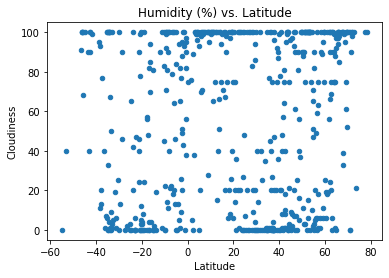

In [56]:
lat_vs_cloudy = city_df.plot(kind="scatter", x="Latitude", y="Cloudiness", 
                                      title="Humidity (%) vs. Latitude")
lat_vs_cloudy

## Latitude vs. Wind Speed Plot

In [ ]:
lat_vs_wind = city_df.plot(kind="scatter", x="Latitude", y="Wind Speed", 
                                      title="Humidity (%) vs. Latitude")
lat_vs_wind

<AxesSubplot:title={'center':'Humidity (%) vs. Latitude'}, xlabel='Latitude', ylabel='Wind Speed'>

In [ ]:
#saved plots
lat_vs_humidity.get_figure().savefig("../output_data/Humidity_vs_Latitude_of_Cities.png")
lat_vs_cloudy.get_figure().savefig("../output_data/Cloudiness_vs_Latitude_of_Cities.png")
lat_vs_wind.get_figure().savefig("../output_data/Wind_Speed_vs_Latitude_of_Cities.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


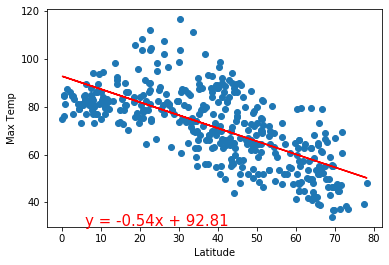

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


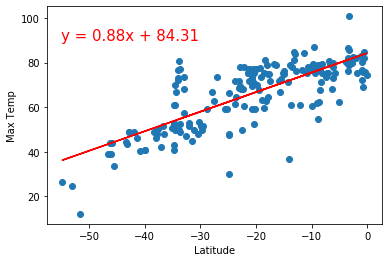

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


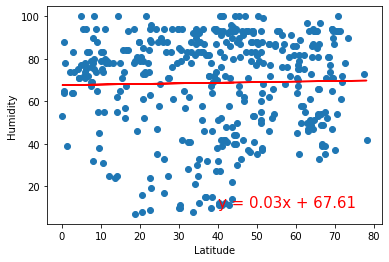

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


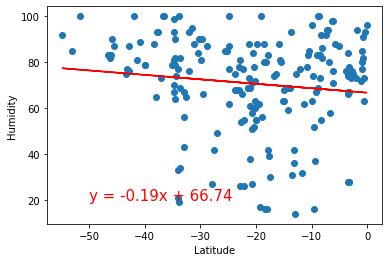

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


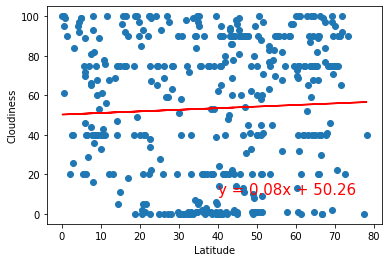

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


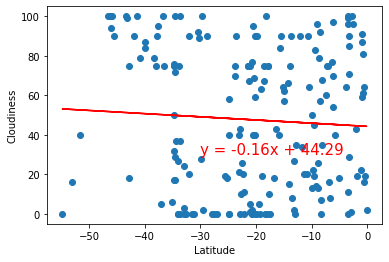

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


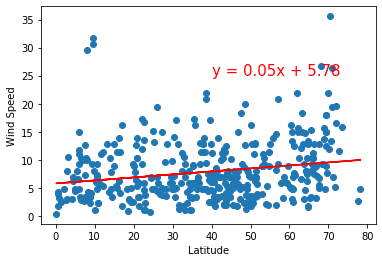

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


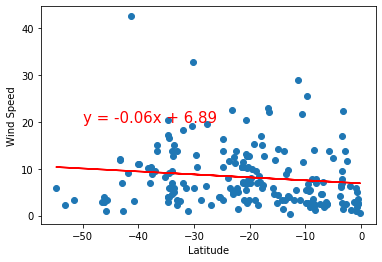